In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
%matplotlib inline

## **1. Creación de datos con fechas en formato de texto**

Simularemos un dataset donde las fechas se han registrado como cadenas de texto, un problema muy común.

In [2]:
np.random.seed(42)

data = {
    'patient_id': [101, 101, 101, 102, 102, 103, 103, 103, 103],
    'event_time': [
        '2025-01-15 08:30:00',
        '2025-01-15 09:15:00',
        '2025-01-15 10:05:00',
        '2025-01-15 08:45:00',
        'not a date',
        '2025-01-16 11:00:00',
        '2025-01-16 11:30:00',
        '2025-01-16 12:30:00',
        '2025-01-17 01:00:00' # Dato nocturno
    ],
    'HR': [75, 78, 76, 88, 90, 65, 68, 66, 70],
    'SBP': [120, 122, 118, 130, 135, 110, 112, 115, 111]
}

df = pd.DataFrame(data)

print("Tipo de datos original:")
print(df.dtypes)
df

Tipo de datos original:
patient_id     int64
event_time    object
HR             int64
SBP            int64
dtype: object


,patient_id,event_time,HR,SBP
0,101,2025-01-15 08:30:00,75,120
1,101,2025-01-15 09:15:00,78,122
2,101,2025-01-15 10:05:00,76,118
3,102,2025-01-15 08:45:00,88,130
4,102,not a date,90,135
5,103,2025-01-16 11:00:00,65,110
6,103,2025-01-16 11:30:00,68,112
7,103,2025-01-16 12:30:00,66,115
8,103,2025-01-17 01:00:00,70,111


## **2. Conversión a formato datetime con `to_datetime`**

La función `pd.to_datetime` es la herramienta fundamental para convertir texto a objetos de fecha y hora.

### **Manejo de errores (Respuesta Quiz 1)**
El parámetro `errors` controla qué hacer si un valor no se puede convertir:
- `errors='raise'` (default): Lanza un error y detiene la ejecución.
- `errors='coerce'`: Reemplaza los valores no válidos con `NaT` (Not a Time).
- `errors='ignore'`: Deja los valores no válidos como estaban (no recomendado).

In [3]:
# Convertir la columna 'event_time' a datetime
df['event_time_dt'] = pd.to_datetime(df['event_time'], errors='coerce')

print("Tipo de datos después de la conversión:")
print(df.dtypes)

print("\nDataFrame con la nueva columna y NaT para el valor inválido:")
df

Tipo de datos después de la conversión:
patient_id                int64
event_time               object
HR                        int64
SBP                       int64
event_time_dt    datetime64[ns]
dtype: object

DataFrame con la nueva columna y NaT para el valor inválido:


,patient_id,event_time,HR,SBP,event_time_dt
0,101,2025-01-15 08:30:00,75,120,2025-01-15 08:30:00
1,101,2025-01-15 09:15:00,78,122,2025-01-15 09:15:00
2,101,2025-01-15 10:05:00,76,118,2025-01-15 10:05:00
3,102,2025-01-15 08:45:00,88,130,2025-01-15 08:45:00
4,102,not a date,90,135,NaT
5,103,2025-01-16 11:00:00,65,110,2025-01-16 11:00:00
6,103,2025-01-16 11:30:00,68,112,2025-01-16 11:30:00
7,103,2025-01-16 12:30:00,66,115,2025-01-16 12:30:00
8,103,2025-01-17 01:00:00,70,111,2025-01-17 01:00:00


## **3. Uso del accesorio `dt` para extraer atributos**

Una vez que tenemos una columna de tipo `datetime`, podemos usar el accesorio `.dt` para acceder a sus componentes.

### **Inferencia clínica con `dt.hour` (Respuesta Quiz 3)**
Analizar la hora del día (`dt.hour`) permite descubrir patrones circadianos:
- **Variaciones de presión arterial:** Típicamente más alta por la mañana.
- **Frecuencia cardíaca:** Puede variar con el ciclo sueño-vigilia.
- **Picos de actividad:** Identificar horas de mayor estrés o actividad en el hospital (ej. rondas médicas, comidas).

In [4]:
# Extraer componentes de la fecha/hora
df['hour'] = df['event_time_dt'].dt.hour
df['day'] = df['event_time_dt'].dt.day
df['month'] = df['event_time_dt'].dt.month
df['day_of_week'] = df['event_time_dt'].dt.day_name() # Nombre del día

print("DataFrame con atributos de fecha/hora extraídos:")
df

DataFrame con atributos de fecha/hora extraídos:


,patient_id,event_time,HR,SBP,event_time_dt,hour,day,month,day_of_week
0,101,2025-01-15 08:30:00,75,120,2025-01-15 08:30:00,8.0,15.0,1.0,Wednesday
1,101,2025-01-15 09:15:00,78,122,2025-01-15 09:15:00,9.0,15.0,1.0,Wednesday
2,101,2025-01-15 10:05:00,76,118,2025-01-15 10:05:00,10.0,15.0,1.0,Wednesday
3,102,2025-01-15 08:45:00,88,130,2025-01-15 08:45:00,8.0,15.0,1.0,Wednesday
4,102,not a date,90,135,NaT,NaN,NaN,NaN,NaN
5,103,2025-01-16 11:00:00,65,110,2025-01-16 11:00:00,11.0,16.0,1.0,Thursday
6,103,2025-01-16 11:30:00,68,112,2025-01-16 11:30:00,11.0,16.0,1.0,Thursday
7,103,2025-01-16 12:30:00,66,115,2025-01-16 12:30:00,12.0,16.0,1.0,Thursday
8,103,2025-01-17 01:00:00,70,111,2025-01-17 01:00:00,1.0,17.0,1.0,Friday


## **4. Establecer un índice temporal (`DatetimeIndex`)**

Para realizar análisis de series de tiempo de manera eficiente, es crucial establecer la columna de fecha/hora como el índice del DataFrame.

In [5]:
# Eliminar filas con fechas inválidas y establecer el índice
df_time_indexed = df.dropna(subset=['event_time_dt']).set_index('event_time_dt')

print("DataFrame con índice temporal:")
df_time_indexed

DataFrame con índice temporal:


,patient_id,event_time,HR,SBP,hour,day,month,day_of_week
event_time_dt,,,,,,,,
2025-01-15 08:30:00,101,2025-01-15 08:30:00,75,120,8.0,15.0,1.0,Wednesday
2025-01-15 09:15:00,101,2025-01-15 09:15:00,78,122,9.0,15.0,1.0,Wednesday
2025-01-15 10:05:00,101,2025-01-15 10:05:00,76,118,10.0,15.0,1.0,Wednesday
2025-01-15 08:45:00,102,2025-01-15 08:45:00,88,130,8.0,15.0,1.0,Wednesday
2025-01-16 11:00:00,103,2025-01-16 11:00:00,65,110,11.0,16.0,1.0,Thursday
2025-01-16 11:30:00,103,2025-01-16 11:30:00,68,112,11.0,16.0,1.0,Thursday
2025-01-16 12:30:00,103,2025-01-16 12:30:00,66,115,12.0,16.0,1.0,Thursday
2025-01-17 01:00:00,103,2025-01-17 01:00:00,70,111,1.0,17.0,1.0,Friday


## **5. Uso de `resample` para agrupar por intervalos de tiempo**

`resample()` es una potente función para cambiar la frecuencia de una serie de tiempo. Es similar a `groupby()`, pero para el tiempo.

### **Función de `resample('1H')` (Respuesta Quiz 2)**
`resample('1H')` agrupa los datos en contenedores (bins) de **1 hora**. Luego, se debe aplicar una función de agregación (como `.mean()`, `.sum()`, `.count()`) para resumir los datos dentro de cada contenedor.

In [6]:
# Agrupar por hora y calcular la media para cada paciente
df_resampled = df_time_indexed.groupby('patient_id')[['HR', 'SBP']].resample('1H').mean()

# 'ffill()' para rellenar los huecos generados por el resample
df_resampled_filled = df_resampled.groupby('patient_id').ffill()

print("Datos remuestreados por hora (con valores faltantes rellenados):")
df_resampled_filled

Datos remuestreados por hora (con valores faltantes rellenados):


C:\Users\ACIng\AppData\Local\Temp\ipykernel_26404\247832160.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_time_indexed.groupby('patient_id')[['HR', 'SBP']].resample('1H').mean()


HR    SBP
patient_id event_time_dt                   
101        2025-01-15 08:00:00  75.0  120.0
           2025-01-15 09:00:00  78.0  122.0
           2025-01-15 10:00:00  76.0  118.0
102        2025-01-15 08:00:00  88.0  130.0
103        2025-01-16 11:00:00  66.5  111.0
           2025-01-16 12:00:00  66.0  115.0
           2025-01-16 13:00:00  66.0  115.0
           2025-01-16 14:00:00  66.0  115.0
           2025-01-16 15:00:00  66.0  115.0
           2025-01-16 16:00:00  66.0  115.0
           2025-01-16 17:00:00  66.0  115.0
           2025-01-16 18:00:00  66.0  115.0
           2025-01-16 19:00:00  66.0  115.0
           2025-01-16 20:00:00  66.0  115.0
           2025-01-16 21:00:00  66.0  115.0
           2025-01-16 22:00:00  66.0  115.0
           2025-01-16 23:00:00  66.0  115.0
           2025-01-17 00:00:00  66.0  115.0
           2025-01-17 01:00:00  70.0  111.0

## **6. Ejemplo: Visualización de señales suavizadas con `resample`**

El remuestreo es útil para suavizar señales ruidosas y observar tendencias a largo plazo.

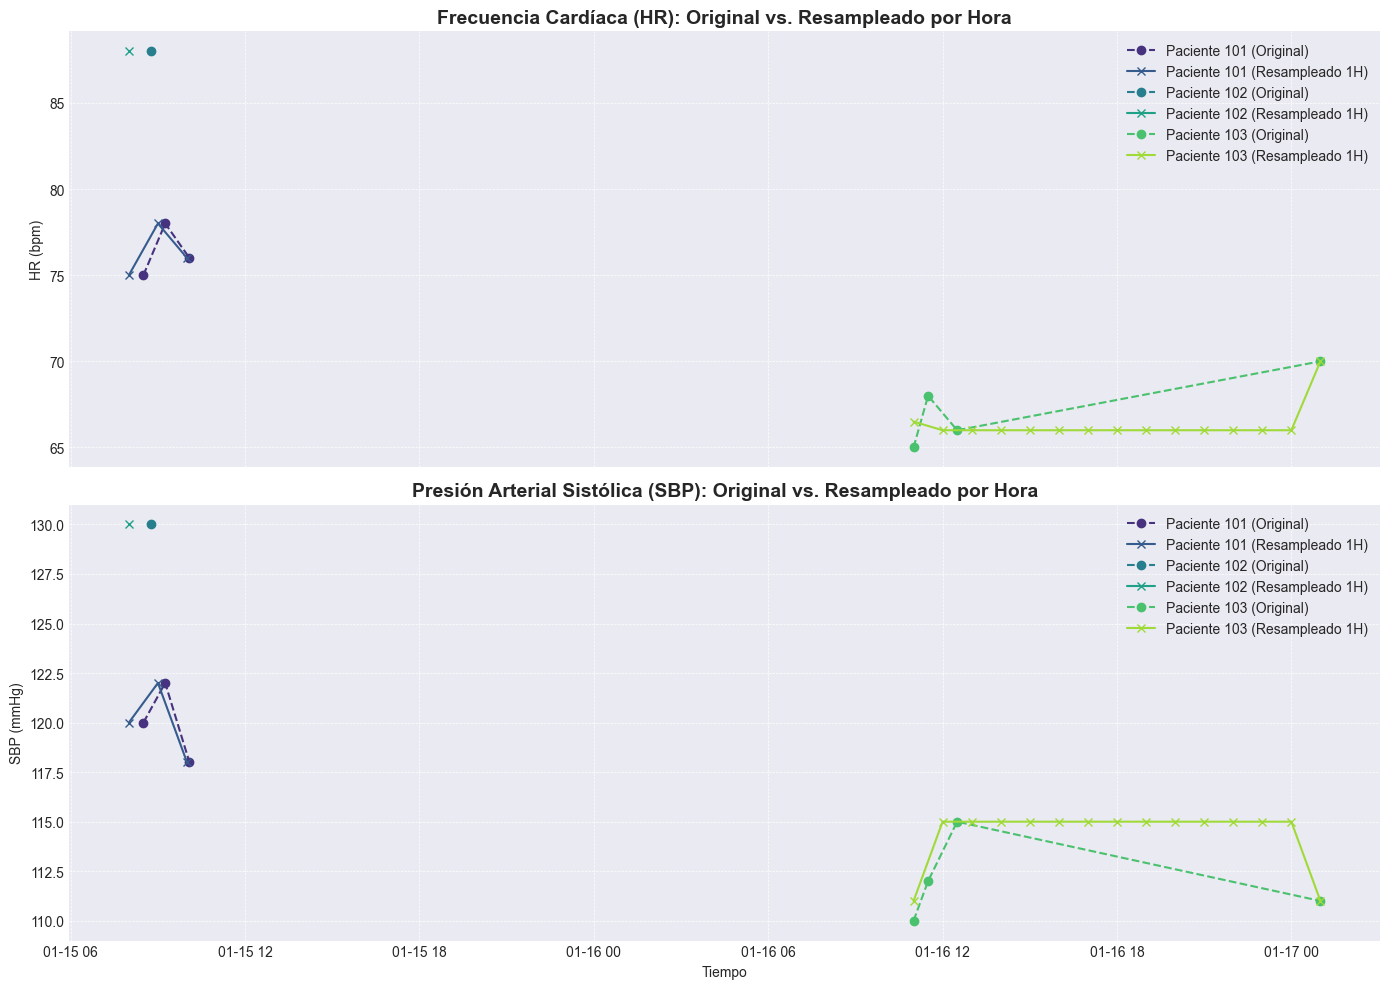

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Graficar HR original vs. resampleada
for patient_id, group in df_time_indexed.groupby('patient_id'):
    # Datos originales
    axes[0].plot(group.index, group['HR'], marker='o', linestyle='--', label=f'Paciente {patient_id} (Original)')
    
    # Datos resampleados
    resampled_group = df_resampled_filled.loc[patient_id]
    axes[0].plot(resampled_group.index, resampled_group['HR'], marker='x', linestyle='-', label=f'Paciente {patient_id} (Resampleado 1H)')

axes[0].set_title('Frecuencia Cardíaca (HR): Original vs. Resampleado por Hora', fontsize=14, fontweight='bold')
axes[0].set_ylabel('HR (bpm)')
axes[0].legend()
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Graficar SBP original vs. resampleada
for patient_id, group in df_time_indexed.groupby('patient_id'):
    # Datos originales
    axes[1].plot(group.index, group['SBP'], marker='o', linestyle='--', label=f'Paciente {patient_id} (Original)')
    
    # Datos resampleados
    resampled_group = df_resampled_filled.loc[patient_id]
    axes[1].plot(resampled_group.index, resampled_group['SBP'], marker='x', linestyle='-', label=f'Paciente {patient_id} (Resampleado 1H)')

axes[1].set_title('Presión Arterial Sistólica (SBP): Original vs. Resampleado por Hora', fontsize=14, fontweight='bold')
axes[1].set_ylabel('SBP (mmHg)')
axes[1].set_xlabel('Tiempo')
axes[1].legend()
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()